In [3]:
from fastai.vision.all import * 

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [6]:
#hide
Path.BASE_PATH = path

In [19]:
DataBlock().dataloaders()

TypeError: dataloaders() missing 1 required positional argument: 'source'

In [114]:
aug_transforms

<function fastai.vision.augment.aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)>

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                )
#                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")
dss = pets.datasets(path/"images")

In [8]:
label_arr_train = [it[1].item() for it in dss.train]
label_arr_val = [it[1].item() for it in dss.valid]
label_df = pd.DataFrame({'label':label_arr_train+label_arr_val}).label.value_counts().reset_index()

In [9]:
label_df['label_name'] = label_df['index'].apply(lambda x: dss.vocab[x])

In [10]:
label_df.head()

,index,label,label_name
0,35,200,wheaten_terrier
1,31,200,samoyed
2,25,200,leonberger
3,21,200,great_pyrenees
4,17,200,chihuahua


In [11]:
dls.train

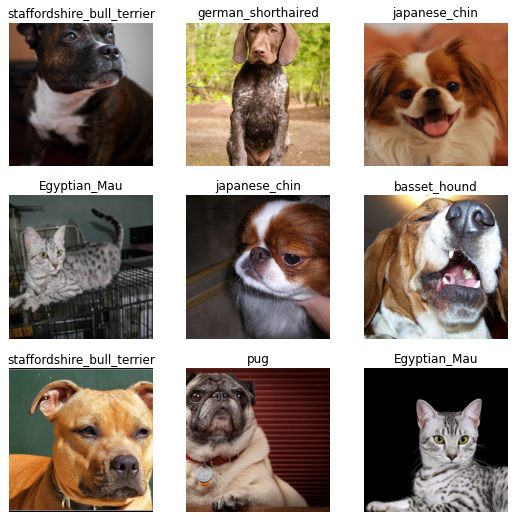

In [12]:
dls.show_batch()

In [13]:
cnn_learner

<function fastai.vision.learner.cnn_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None, loss_func=None, opt_func=<function Adam at 0x7fe3f4914598>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, init=<function kaiming_normal_ at 0x7fe40f950e18>, custom_head=None, concat_pool=True, lin_ftrs=None, ps=0.5, first_bn=True, bn_final=False, lin_first=False, y_range=None)>

In [14]:
1e-02

0.01

In [15]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fit(2,1e-02)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.055336,0.981823,0.222598,0.777402,01:05
1,0.783052,0.929583,0.242896,0.757104,01:04


In [141]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.741928,0.349226,0.115697,0.884303,01:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.408850,0.291034,0.092016,0.907984,01:20
1,0.212304,0.230287,0.077808,0.922192,01:20


In [142]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])
learn.fit_one_cycle(2,0.01)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.992725,0.861597,0.219892,0.780108,01:04
1,0.492328,0.280399,0.083221,0.916779,01:04


In [145]:
learn.fit_one_cycle

<bound method Learner.fit_one_cycle of <fastai.learner.Learner object at 0x7f39095ebf28>>

In [136]:
dir(learn)

['T_destination',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__stored_args__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_bn_bias_state',
 '_buffers',
 '_call_impl',
 '_call_one',
 '_component_attr_filter',
 '_default',
 '_dir',
 '_do_epoch',
 '_do_epoch_train',
 '_do_epoch_validate',
 '_do_fit',
 '_do_one_batch',
 '_end_cleanup',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_item_by_idx',
 '_get_name',
 '_grab_cbs',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_metrics',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_h

In [16]:
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>